# Data Wrangling on the Million Song Dataset. 
Get started by following these set up instructions first: 
* Set the server-name, database-name, user-id and password below. 
* Hit the 'Play' to run the cell before you proceed. This will set the credentials and settings.
* Run Cell 1. & 2. before running the others. 

In [1]:
SERVER_NAME='<WAREHOUSE-NAME>.database.windows.net'
DATABASE_NAME='<DATABASE-NAME>'
USERID='<USERNAME>'
PASSWORD='<PASSWORD>'

You are now all set to interact with the SQL DW data. To run a query, click the cell in question and hit the **'Play'** button to query your SQL DW instance. 

### 1. Report number of rows and columns in raw tables.

In [2]:
import pyodbc
import pandas as pd
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from time import time
import pyodbc
import os
import tables
import time
import pylab
from mpl_toolkits.mplot3d import Axes3D

# Connect to the database. 
driver = 'DRIVER={SQL Server Native Client 11.0}'
server = 'SERVER=' + SERVER_NAME 
database = 'DATABASE=' + DATABASE_NAME
uid = 'UID=' + USERID 
pwd = 'PWD=' + PASSWORD
CONNECTION_STRING = ';'.join([driver,server,database,uid,pwd])
conn = pyodbc.connect(CONNECTION_STRING)

# Get rows in SongInfo
nrows = pd.read_sql('''
    SELECT SUM(rows) FROM sys.partitions
    WHERE object_id = OBJECT_ID('SongInfo')
''', conn)

print 'Total number of rows in SongInfo = %d' % nrows.iloc[0,0]

# Get rows in TitleBreakdown.
nrows = pd.read_sql('''
    SELECT SUM(rows) FROM sys.partitions
    WHERE object_id = OBJECT_ID('TitleBreakdown')
''', conn)

print 'Total number of rows in TitleBreakdown = %d' % nrows.iloc[0,0]


/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Total number of rows in SongInfo = 10001
Total number of rows in TitleBreakdown = 8379


#### 2. Read Table Data In
Next, we load the TitleBreakdown & SongInfo tables into a dataframe.

In [3]:
t0 = time.time()

si = pd.read_sql('''select * from SongInfo''', conn)
tb = pd.read_sql('''select * from TitleBreakdown''', conn)

t1 = time.time()
print 'Time to read tables is %f seconds' % (t1-t0)
print 'Number of rows and columns in SongInfo = (%d, %d)' % (si.shape[0], si.shape[1])
print 'Number of rows and columns in TitleBreakdown = (%d, %d)' % (tb.shape[0], tb.shape[1])

Time to read tables is 0.636690 seconds
Number of rows and columns in SongInfo = (10001, 18)
Number of rows and columns in TitleBreakdown = (8379, 2)


#### 3. Table Data Descriptive Statistics

In [4]:
si['Duration'].describe()

count    10001.000000
mean       238.511689
std        114.132569
min          1.044440
25%        176.038730
50%        223.059140
75%        276.375060
max       1819.767710
Name: Duration, dtype: float64

#### 4. Song Duration Box Plot

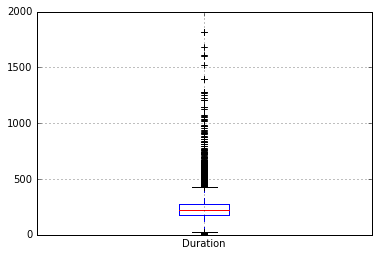

In [9]:
si.boxplot(column='Duration',return_type='dict')
plt.show()

#### 5. Binned Song Duration Distribution

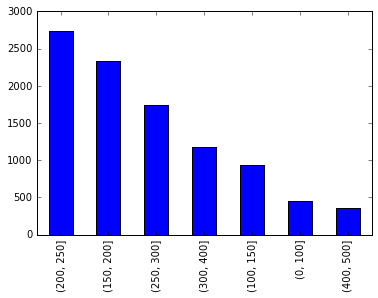

In [11]:
song_dur_bins = [0, 100, 150, 200, 250, 300, 400, 500]
si['Duration']
song_dur_bin_id = pd.cut(si['Duration'], song_dur_bins)
pd.Series(song_dur_bin_id).value_counts().plot(kind='bar')
plt.show()

#### 6. Albums By Release Year

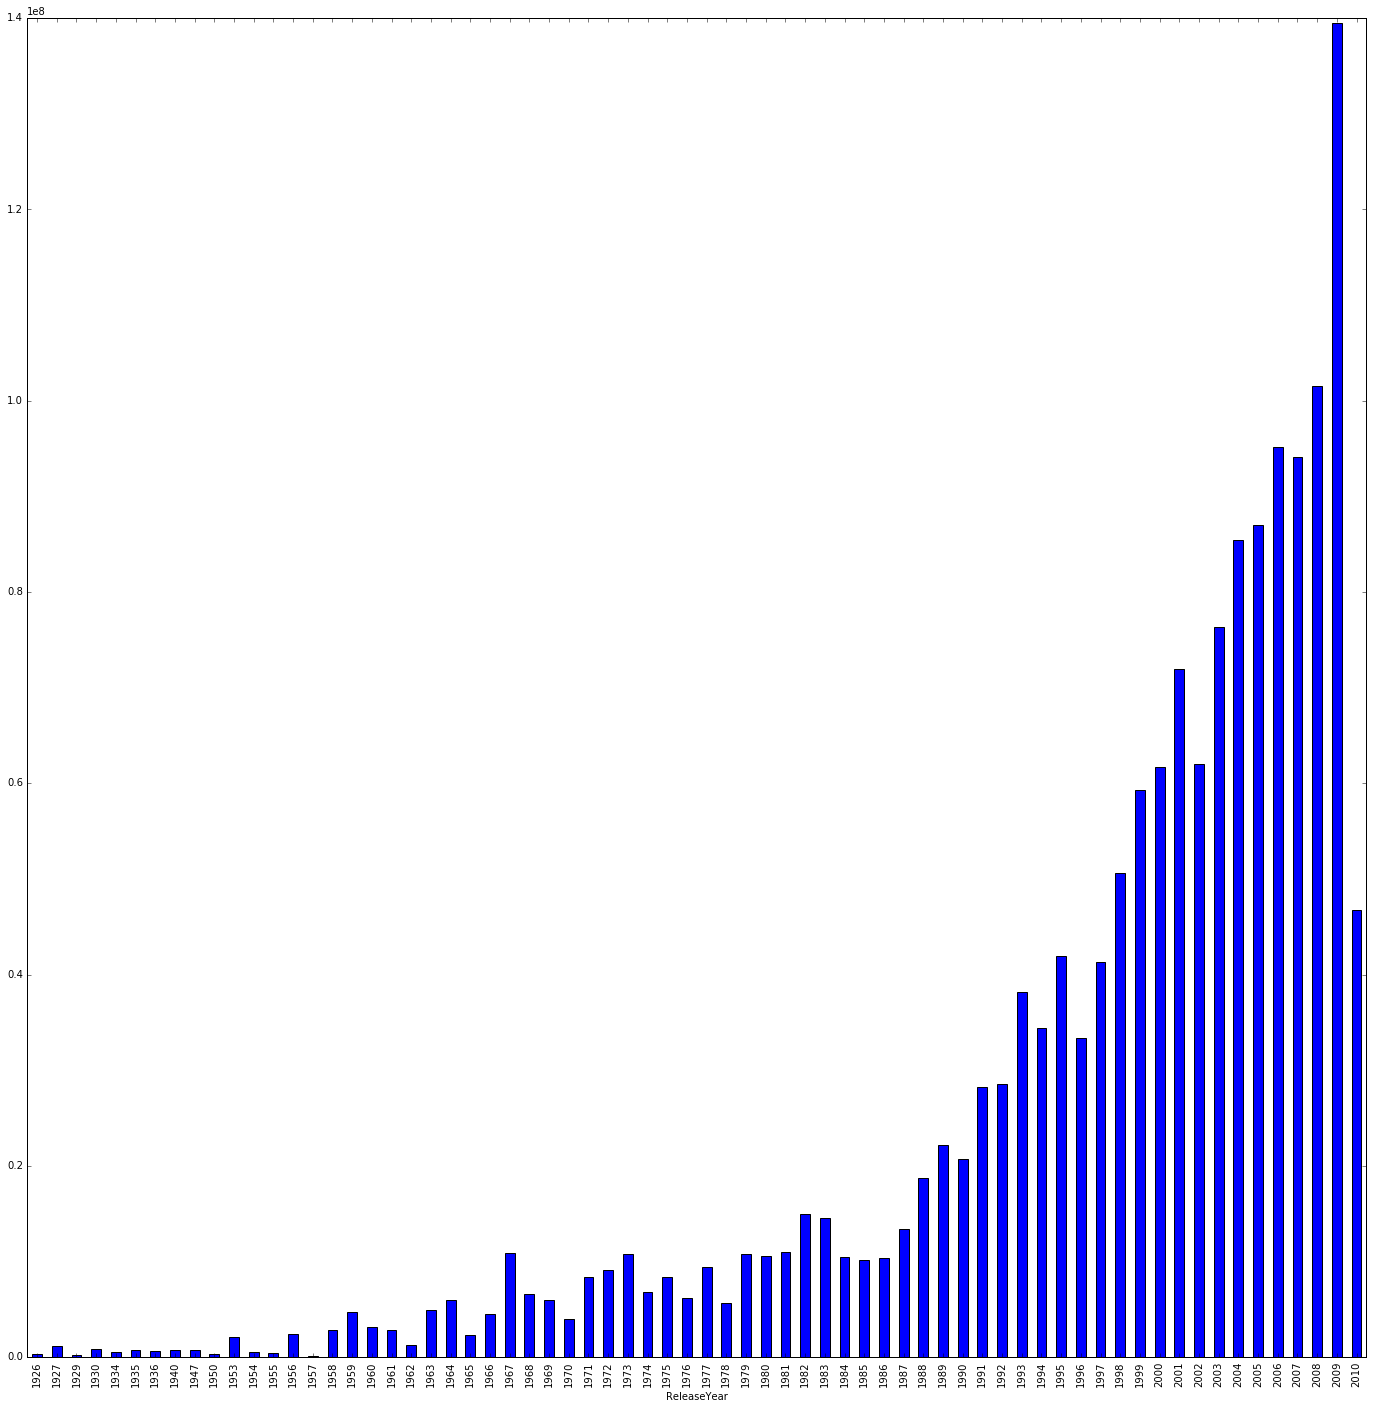

In [12]:
filtered_si = si[si['ReleaseYear'] > 0]
filtered_si.groupby('ReleaseYear').AlbumID.sum().plot(kind='bar', figsize = (24,24))
plt.show()

#### 7. Top 10 Song Themes

In [13]:
pd.read_sql('SELECT TOP 10 * FROM TitleBreakdown ORDER BY Occurences DESC', conn)

,Word,Occurences
0,love,323
1,live,215
2,blues,108
3,time,89
4,man,82
5,night,78
6,baby,68
7,heart,66
8,will,60
9,girl,56


#### 8. Song Tempo By Duration

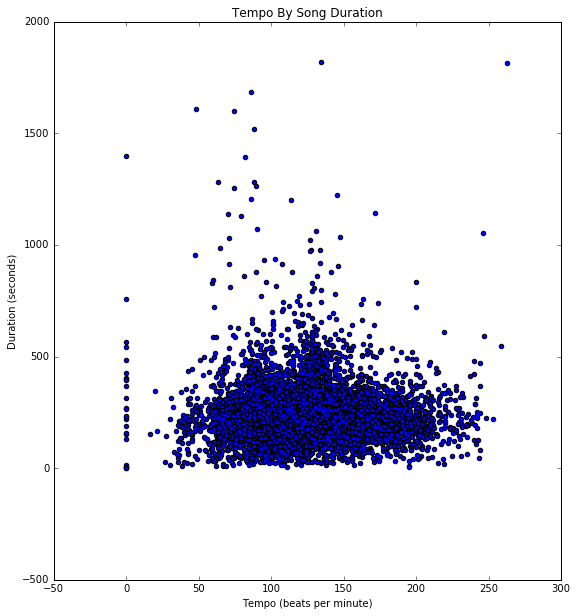

In [14]:
td = pd.read_sql('SELECT Tempo, Duration FROM SongInfo', conn)
fig=plt.figure(figsize=(34, 34))
ax1=fig.add_subplot(1, 2, 1)
P=td.plot(ax=ax1, title='Tempo By Song Duration', kind='scatter', x='Tempo', y='Duration',
                figsize=(20,10), grid=False)
plt.xlabel('Tempo (beats per minute)')
plt.ylabel('Duration (seconds)')
plt.show()

#### 9. Song Durations Over The Years

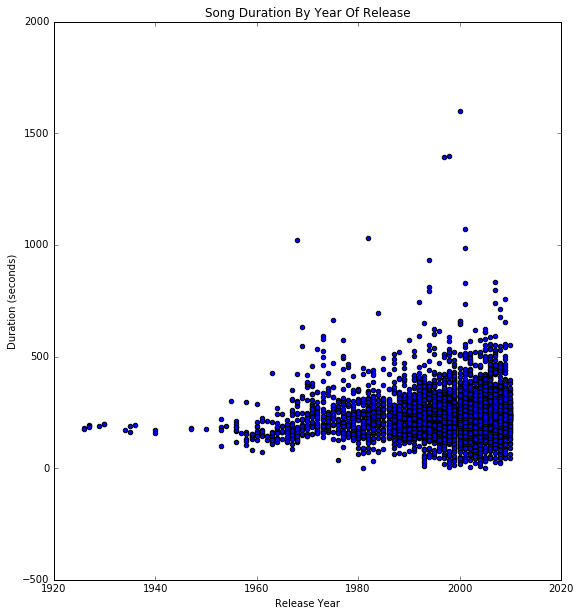

In [15]:
td = pd.read_sql('SELECT Duration, ReleaseYear FROM SongInfo WHERE ReleaseYear > 0', conn)
fig=plt.figure(figsize=(34, 34))
ax1=fig.add_subplot(1, 2, 1)
P=td.plot(ax=ax1, title='Song Duration By Year Of Release', kind='scatter', x='ReleaseYear', y='Duration',
                figsize=(20,10), grid=False)
plt.xlabel('Release Year')
plt.ylabel('Duration (seconds)')
plt.show()

### 10. Tempo vs. Duration vs. Release Year 

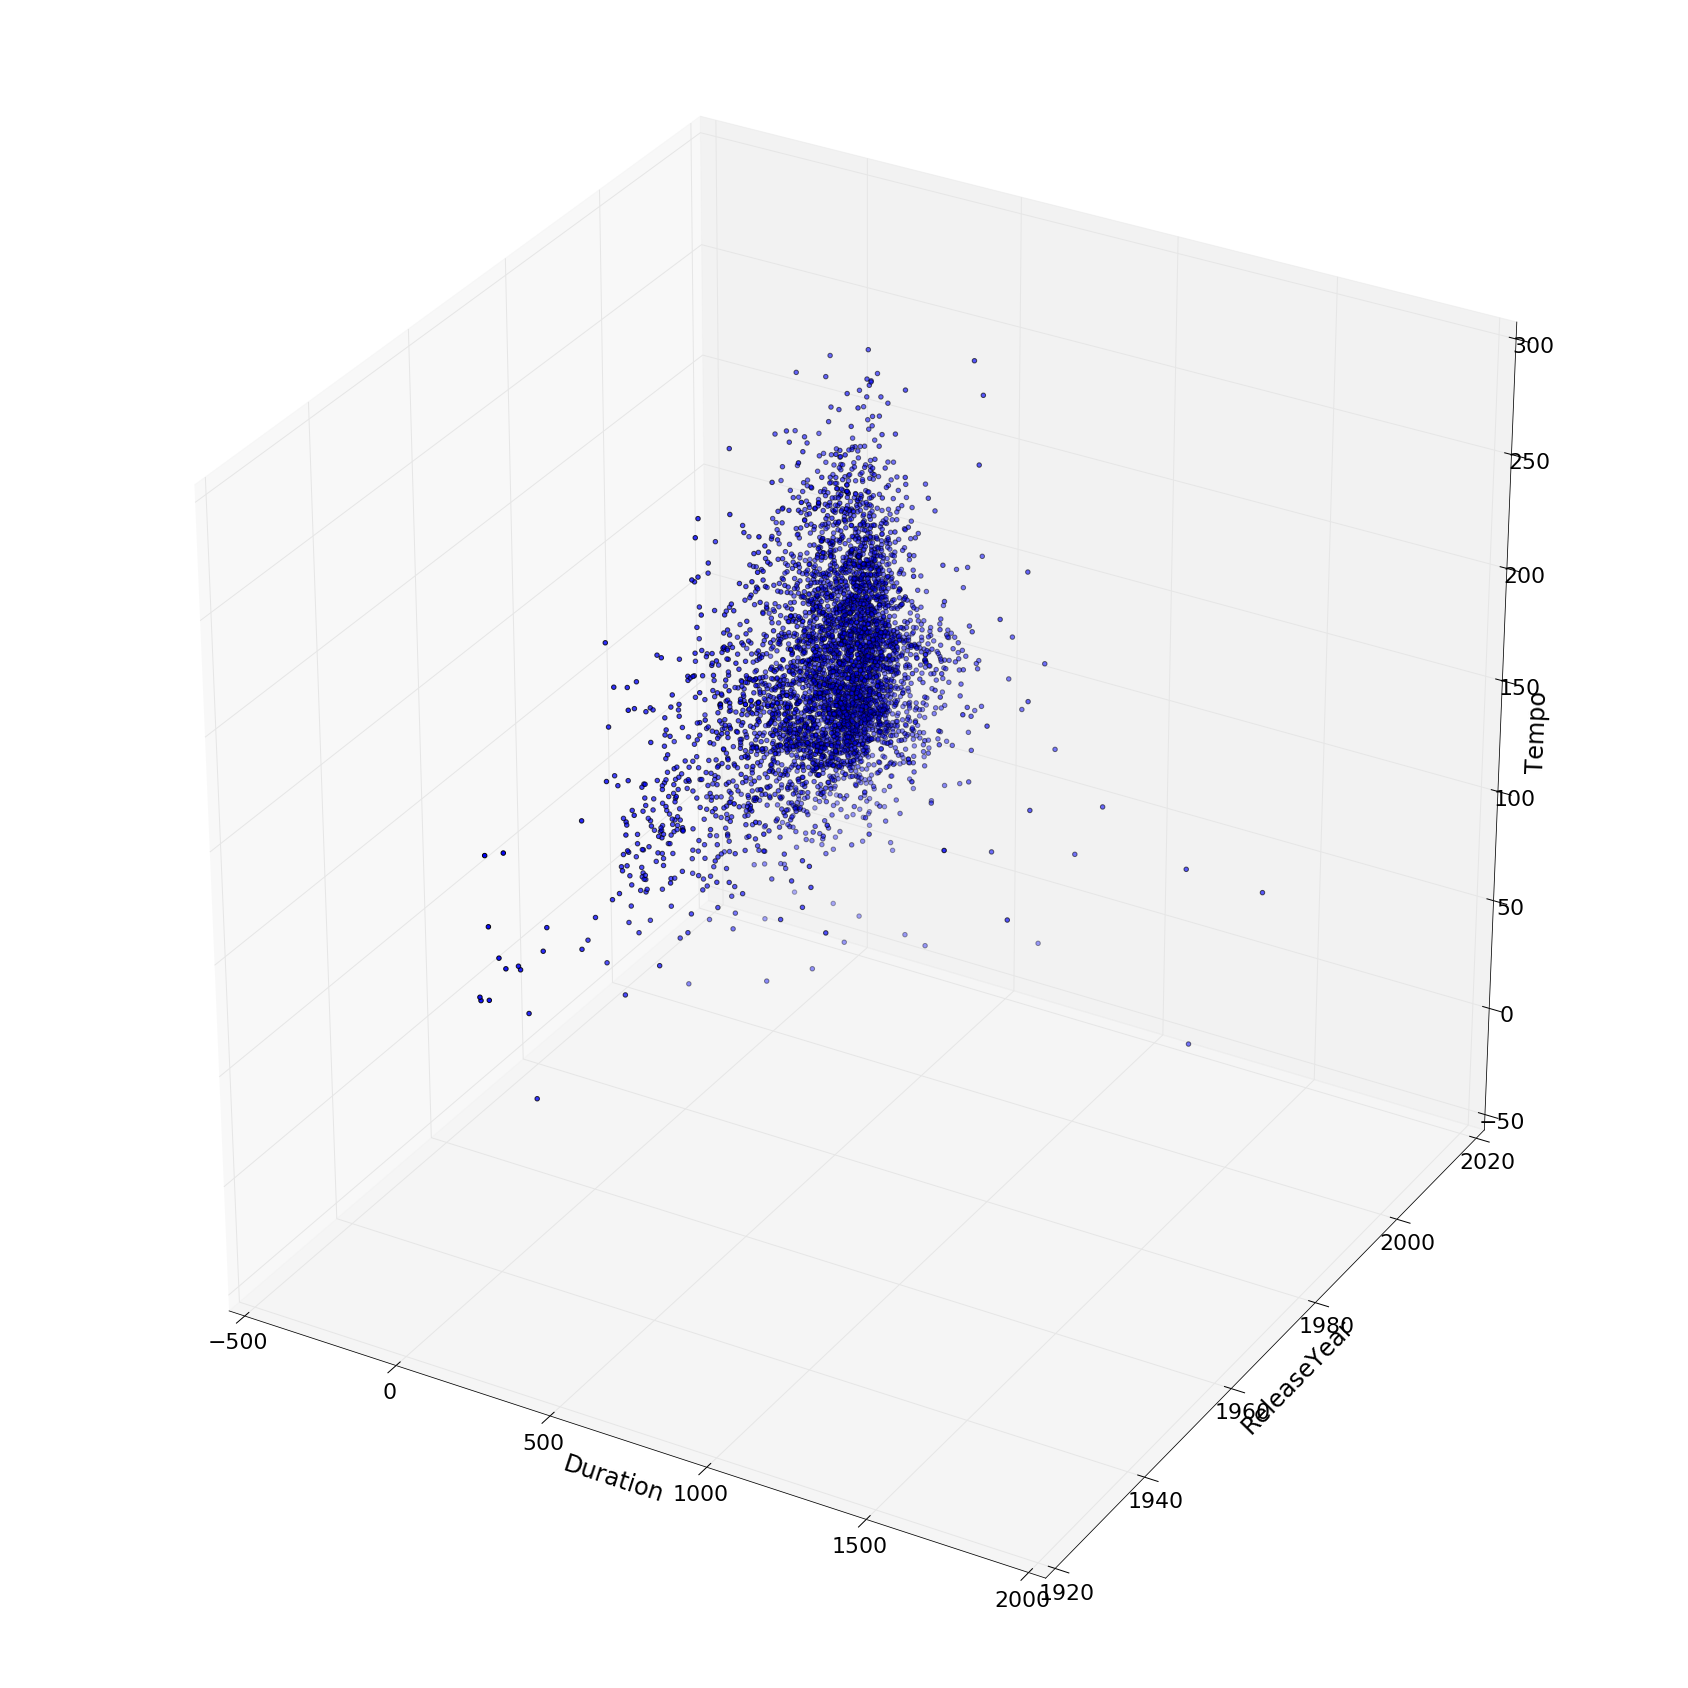

In [16]:
font = {'size'   : 22}
matplotlib.rc('font', **font)

td = pd.read_sql('SELECT Duration, ReleaseYear, Tempo FROM SongInfo WHERE ReleaseYear > 0', conn)

fig = plt.figure(figsize=(30, 30)).gca(projection='3d')
fig.scatter(td['Duration'], td['ReleaseYear'], td['Tempo'])
fig.set_xlabel('Duration', fontsize=24)
fig.set_ylabel('ReleaseYear', fontsize=24)
fig.set_zlabel('Tempo', fontsize=24)
plt.show()